In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import numpy as np

import pyap

# load hospital location data 

In [2]:
data_path = '../data/'
file_nm_hosp = 'hosp_rankings_local.csv'
hosp_df = pd.read_csv(data_path+file_nm_hosp).iloc[:,1:]
print(hosp_df.shape)
hosp_df.head()

(185, 37)


,Name,AHA ID,Hospital ID,Address,City,State Name,State Abbrev,Zip Code,Latitude,Longitude,Search Location,Distance from Search Location,Phone,URL,Recognized in State,State Rank,Tied in State?,Region,Recognized in Region,Region Rank,Tied in Region?,Metro,Recognized in Metro,Metro Rank,Tied in Metro?,# of High Performing Adult Specialties,# of National Rankings (Adult),# of National Rankings (Pediatrics),Updated,Name (Specialty),Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated_Spec
0,NYU Langone Hospitals,6212925,6212925,550 First Avenue,New York,New York,NY,10016-6402,40.7421,-73.9743,"New York, NY",NaN,(212) 263-7300,https://health.usnews.com/best-hospitals/area/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY",True,1.0,False,0,14,3,2023-01-04 20:48:35.731110,Perlmutter Cancer Center at NYU Langone Hospitals,IHQCANC,62.9/100,19.0,False,False,adult,2023-01-04 20:29:21.680567
1,New York-Presbyterian Hospital-Columbia and Co...,6210024,6210024,525 East 68th Street,New York,New York,NY,10065-4870,40.7647,-73.9540,"New York, NY",NaN,(877) 697-9355,https://health.usnews.com/best-hospitals/area/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY",True,2.0,False,1,14,10,2023-01-04 20:48:35.731110,New York-Presbyterian Hospital-Columbia and Co...,IHQCANC,67.6/100,12.0,False,False,adult,2023-01-04 20:29:21.680567
2,Mount Sinai Hospital,6213140,6213140,One Gustave L Levy Place,New York,New York,NY,10029-0310,40.7900,-73.9537,"New York, NY",NaN,(212) 241-6500,https://health.usnews.com/best-hospitals/area/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY",True,3.0,False,1,11,3,2023-01-04 20:48:35.731110,Mount Sinai Hospital,IHQCANC,59.0/100,28.0,False,False,adult,2023-01-04 20:29:21.680567
3,Lenox Hill Hospital at Northwell Health,6212990,6212990,100 East 77th Street,New York,New York,NY,10075-1850,40.7738,-73.9608,"New York, NY",NaN,(212) 434-2000,https://health.usnews.com/best-hospitals/area/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY",True,4.0,False,2,9,0,2023-01-04 20:48:35.731110,Lenox Hill Hospital at Northwell Health,IHQCANC,54.1/100,50.0,False,False,adult,2023-01-04 20:29:21.680567
4,North Shore University Hospital at Northwell H...,6212357,6212357,300 Community Drive,Manhasset,New York,NY,11030-3816,40.7776,-73.7017,"New York, NY",NaN,(516) 562-0100,https://health.usnews.com/best-hospitals/area/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York, NY",True,5.0,False,0,11,0,2023-01-04 20:48:35.731110,North Shore University Hospital at Northwell H...,IHQCANC,55.5/100,41.0,True,False,adult,2023-01-04 20:29:21.680567


# review missing value (hospital location data)

In [3]:
missing_hosp = pd.DataFrame((hosp_df.isna().sum()/hosp_df.shape[0])*100).reset_index()
missing_hosp.rename(columns = {'index' : 'Column_Name',
                              0 : 'missing_values_perc'}, inplace = True)
missing_hos_df = missing_hosp.sort_values(by = 'missing_values_perc').query('missing_values_perc > 0')
missing_hos_df

,Column_Name,missing_values_perc
30,Specialty ID,73.513514
29,Name (Specialty),73.513514
31,Specialty Score,73.513514
36,Updated_Spec,73.513514
35,Specialty Ranking Type,73.513514
23,Metro Rank,83.243243
32,Specialty Ranking,96.216216
33,Specialty Ranking Tied?,96.216216
34,Specialty Ranking Revoked?,96.216216
20,Tied in Region?,100.000000


[Text(0, 0, '73.5135'),
 Text(0, 0, '73.5135'),
 Text(0, 0, '73.5135'),
 Text(0, 0, '73.5135'),
 Text(0, 0, '73.5135'),
 Text(0, 0, '83.2432'),
 Text(0, 0, '96.2162'),
 Text(0, 0, '96.2162'),
 Text(0, 0, '96.2162'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100'),
 Text(0, 0, '100')]

<Figure size 1800x500 with 0 Axes>

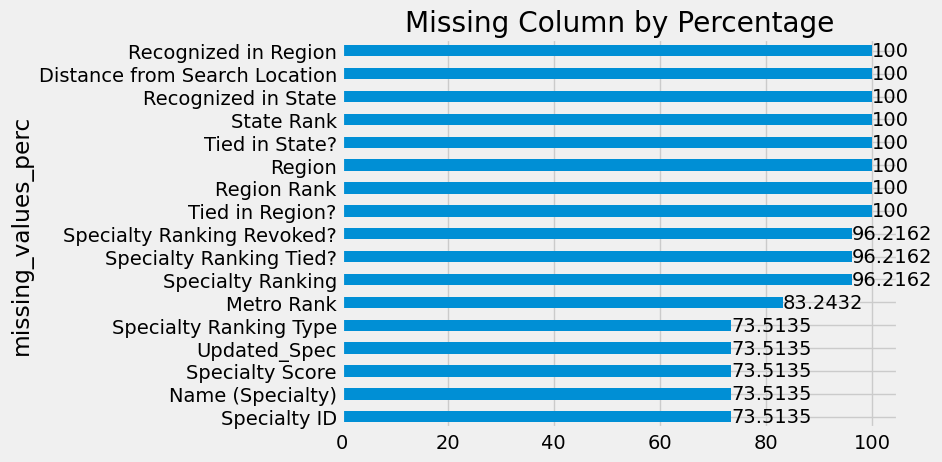

In [4]:
plt.figure(figsize=(18, 5),constrained_layout=True)
plt.style.use('fivethirtyeight')
ax = missing_hos_df.set_index('Column_Name').plot(kind = 'barh', xlabel = 'missing_values_perc',legend=False)
ax.set_title('Missing Column by Percentage')
ax.bar_label(ax.containers[0])


# remove the missing columns

In [6]:
hosp_df_rmv_missing_col = hosp_df[hosp_df.columns[~hosp_df.columns.isin(missing_hos_df.Column_Name)]]
hosp_df_rmv_missing_col

,Name,AHA ID,Hospital ID,Address,City,State Name,State Abbrev,Zip Code,Latitude,Longitude,Search Location,Phone,URL,Metro,Recognized in Metro,Tied in Metro?,# of High Performing Adult Specialties,# of National Rankings (Adult),# of National Rankings (Pediatrics),Updated
0,NYU Langone Hospitals,6212925,6212925,550 First Avenue,New York,New York,NY,10016-6402,40.7421,-73.9743,"New York, NY",(212) 263-7300,https://health.usnews.com/best-hospitals/area/...,"New York, NY",True,False,0,14,3,2023-01-04 20:48:35.731110
1,New York-Presbyterian Hospital-Columbia and Co...,6210024,6210024,525 East 68th Street,New York,New York,NY,10065-4870,40.7647,-73.9540,"New York, NY",(877) 697-9355,https://health.usnews.com/best-hospitals/area/...,"New York, NY",True,False,1,14,10,2023-01-04 20:48:35.731110
2,Mount Sinai Hospital,6213140,6213140,One Gustave L Levy Place,New York,New York,NY,10029-0310,40.7900,-73.9537,"New York, NY",(212) 241-6500,https://health.usnews.com/best-hospitals/area/...,"New York, NY",True,False,1,11,3,2023-01-04 20:48:35.731110
3,Lenox Hill Hospital at Northwell Health,6212990,6212990,100 East 77th Street,New York,New York,NY,10075-1850,40.7738,-73.9608,"New York, NY",(212) 434-2000,https://health.usnews.com/best-hospitals/area/...,"New York, NY",True,False,2,9,0,2023-01-04 20:48:35.731110
4,North Shore University Hospital at Northwell H...,6212357,6212357,300 Community Drive,Manhasset,New York,NY,11030-3816,40.7776,-73.7017,"New York, NY",(516) 562-0100,https://health.usnews.com/best-hospitals/area/...,"New York, NY",True,False,0,11,0,2023-01-04 20:48:35.731110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Veterans Affairs New Jersey Health Care System...,6220006,6220006,385 Tremont Avenue,East Orange,New Jersey,NJ,07018-1095,40.7527,-74.2361,"New York, NY",(973) 676-1000,https://health.usnews.com/best-hospitals/area/...,"New York, NY",False,False,0,0,0,2023-01-04 20:48:35.731110
181,Veterans Affairs New York Harbor Healthcare Sy...,6210035,6210035,800 Poly Place,Brooklyn,New York,NY,11209-7104,40.6068,-74.0212,"New York, NY",(718) 630-3500,https://health.usnews.com/best-hospitals/area/...,"New York, NY",False,False,0,0,0,2023-01-04 20:48:35.731110
182,Westchester Medical Center,6215150,6215150,100 Woods Road,Valhalla,New York,NY,10595-1530,41.0862,-73.8060,"New York, NY",(914) 493-7000,https://health.usnews.com/best-hospitals/area/...,"New York, NY",False,False,0,0,0,2023-01-04 20:48:35.731110
183,Wyckoff Heights Medical Center,6210970,PA6210970,374 Stockholm Street,Brooklyn,New York,NY,11237-4006,40.7043,-73.9181,"New York, NY",(718) 963-7272,https://health.usnews.com/best-hospitals/area/...,"New York, NY",False,False,0,0,0,2023-01-04 20:48:35.731110


In [ ]:
# find any duplicates

In [7]:
hosp_df_rmv_missing_col['Hospital ID'].duplicated().sum()

0

In [8]:
hosp_df_rmv_missing_col.groupby(['State Name'])['Hospital ID'].count()

State Name
New Jersey     76
New York      109
Name: Hospital ID, dtype: int64

# load hospital ranking 

In [9]:
file_nm_rank = 'spec_hosp_rankings.csv'
rank_df = pd.read_csv(data_path+file_nm_rank).iloc[:,1:]
rank_df.head()

,Name (Specialty),AHA ID,Hospital ID,Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated
0,University of Texas MD Anderson Cancer Center,6741945,6741945,IHQCANC,100.0/100,1.0,False,False,adult,2023-01-04 20:29:21.680567
1,Memorial Sloan Kettering Cancer Center,6213060,6213060,IHQCANC,85.7/100,2.0,False,False,adult,2023-01-04 20:29:21.680567
2,Mayo Clinic,6610451,6610451,IHQCANC,79.9/100,3.0,False,False,adult,2023-01-04 20:29:21.680567
3,Dana-Farber/Brigham and Women's Cancer Center,6140583,6140583,IHQCANC,76.0/100,4.0,False,False,adult,2023-01-04 20:29:21.680567
4,UCLA Medical Center,6931755,6931755,IHQCANC,73.2/100,5.0,False,False,adult,2023-01-04 20:29:21.680567


In [10]:
print(f'\033[1mThere are total of {rank_df.shape[0]} hospitals specialized in CANCER in ranking dataframe\033[0m\n')

There are total of 913 hospitals specialized in CANCER in ranking dataframe



## Match 185 hositals' address and coordinates with all cancer center

In [12]:
match_nyc_df = rank_df.merge(hosp_df_rmv_missing_col[['Hospital ID','Address','City','State Name','State Abbrev','Zip Code','Latitude','Longitude']],\
                    how = 'inner', on = ['Hospital ID'])

print(f'After merge, there are {match_nyc_df.shape[0]} cancer centers that match those of in NYC')
match_nyc_df.head()

After merge, there are 49 cancer centers that match those of in NYC


,Name (Specialty),AHA ID,Hospital ID,Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated,Address,City,State Name,State Abbrev,Zip Code,Latitude,Longitude
0,Memorial Sloan Kettering Cancer Center,6213060,6213060,IHQCANC,85.7/100,2.0,False,False,adult,2023-01-04 20:29:21.680567,1275 York Avenue,New York,New York,NY,10065-6007,40.7641,-73.9560
1,New York-Presbyterian Hospital-Columbia and Co...,6210024,6210024,IHQCANC,67.6/100,12.0,False,False,adult,2023-01-04 20:29:21.680567,525 East 68th Street,New York,New York,NY,10065-4870,40.7647,-73.9540
2,Perlmutter Cancer Center at NYU Langone Hospitals,6212925,6212925,IHQCANC,62.9/100,19.0,False,False,adult,2023-01-04 20:29:21.680567,550 First Avenue,New York,New York,NY,10016-6402,40.7421,-73.9743
3,Mount Sinai Hospital,6213140,6213140,IHQCANC,59.0/100,28.0,False,False,adult,2023-01-04 20:29:21.680567,One Gustave L Levy Place,New York,New York,NY,10029-0310,40.7900,-73.9537
4,Montefiore Medical Center,6213100,6213100,IHQCANC,57.3/100,35.0,True,False,adult,2023-01-04 20:29:21.680567,111 East 210th Street,Bronx,New York,NY,10467-2401,40.8808,-73.8795


In [18]:
remain_rank_df1 = rank_df[~rank_df['AHA ID'].isin(match_nyc_df['AHA ID'].values.tolist())]
print(f'Now there are {remain_rank_df1.shape[0]} cancer centers missing address')

Now there are 864 cancer centers missing address


# found datasets that contain hospitals in the US with address in it
# loading the data

In [19]:
gen_hos_df =  pd.read_csv('../data/Hospital_General_Information.csv',sep=",", encoding='cp1252').iloc[:,1:]
print(gen_hos_df.shape)
display(gen_hos_df.head())
print('\n')
gen_hos_loc_df =  pd.read_csv('../data/hospital_locations.csv').iloc[:,1:]
print(gen_hos_loc_df.shape)
display(gen_hos_loc_df.head())
print('\n')

(4818, 29)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,True,NaN,3.0,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,True,NaN,4.0,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n"
2,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,True,NaN,3.0,NaN,Below the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL 35801\n"
3,20001,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508,ANCHORAGE,9072123675,Acute Care Hospitals,Voluntary non-profit - Church,True,NaN,3.0,NaN,Same as the National average,NaN,Below the National average,NaN,Above the National average,NaN,Below the National average,NaN,Below the National average,NaN,Below the National average,NaN,Same as the National average,NaN,"BOX 196604\nANCHORAGE, AK 99508\n"
4,20018,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559,BETHEL,9075436300,Acute Care Hospitals,Tribal,True,NaN,3.0,This hospitalÂ’s star rating only includes dat...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Below the National average,NaN,Below the National average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"PO BOX 287\nBETHEL, AK 99559\n"




(7623, 34)


,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,TELEPHONE,TYPE,STATUS,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,OPEN,40,VENTURA,06111,USA,34.154939,-118.815736,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2020/08/01 00:00:00+00,IMAGERY/OTHER,2014/02/10 00:00:00+00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,40,NOT AVAILABLE,N
1,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,OPEN,127,LOS ANGELES,06037,USA,34.023647,-118.184165,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2020/08/01 00:00:00+00,IMAGERY/OTHER,2014/02/10 00:00:00+00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
2,-1.317190e+07,4.041752e+06,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,(323) 462-2271,GENERAL ACUTE CARE,OPEN,100,LOS ANGELES,06037,USA,34.096391,-118.325235,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2020/08/01 00:00:00+00,IMAGERY/OTHER,2014/02/10 00:00:00+00,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N
3,-1.313208e+07,4.037270e+06,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,OPEN,95,LOS ANGELES,06037,USA,34.063039,-117.967438,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2020/08/01 00:00:00+00,IMAGERY/OTHER,2014/02/10 00:00:00+00,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N
4,-1.315222e+07,4.009980e+06,6,25190712,LAKEWOOD REGIONAL MEDICAL CENTER,3700 EAST SOUTH STREET,LAKEWOOD,CA,90712,NOT AVAILABLE,NOT AVAILABLE,GENERAL ACUTE CARE,OPEN,172,LOS ANGELES,06037,USA,33.859707,-118.148403,622110,GENERAL MEDICAL AND SURGICAL HOSPITALS,http://www.oshpd.ca.gov/hid/facility-listing.html,2020/08/01 00:00:00+00,IMAGERY/OTHER,2014/02/10 00:00:00+00,http://www.lakewoodregional.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,172,NOT AVAILABLE,N


# adding coordinates and address for each hospital in ranking hospital dataframe

In [32]:

# address = 'PONCE DE LEON AVENUE STOP 36,HATO REY 138,PR,00918'
# address = '55 FRUIT STREET,BOSTON,MA'
address = 'Providence Alaska Medical Center'
def find_coordinates(address):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(address, timeout=1000000)
    if location == None:
        return [0,0]
    else:
        return location.latitude,location.longitude

find_coordinates(address)
# print("The latitude of the location is: ", location.latitude)
# print("The longitude of the location is: ", location.longitude)

address = 'Providence Alaska Medical Center'
def find_address(address):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(address, timeout=1000000)
    if location == None:
        return 'Not found'
    else:
        return ' '.join(location.address.split(',')[1:3])+','+','.join(location.address.split(',')[3:])

find_address(address)

' 3200  Providence Drive, Anchorage, Alaska, 99515, United States'

In [25]:
gen_hos_df_addr = gen_hos_df[['Hospital Name','Address','City','State','ZIP Code']]
gen_hos_df_addr.rename(columns = {'Hospital Name':'NAME',
                                    'Address':'ADDRESS',
                                    'City':'CITY',
                                    'State':'STATE',
                                    'ZIP Code':'ZIP'}, inplace = True)
gen_hos_df_addr.head()

/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/3366303188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_hos_df_addr.rename(columns = {'Hospital Name':'NAME',


,NAME,ADDRESS,CITY,STATE,ZIP
0,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957
1,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278
2,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801
3,PROVIDENCE ALASKA MEDICAL CENTER,BOX 196604,ANCHORAGE,AK,99508
4,YUKON KUSKOKWIM DELTA REG HOSPITAL,PO BOX 287,BETHEL,AK,99559


In [44]:
gen_hos_df_addr['ZIP'] = gen_hos_df_addr['ZIP'].astype('str')

/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/4275543752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_hos_df_addr['ZIP'] = gen_hos_df_addr['ZIP'].astype('str')


In [47]:
gen_hos_df_addr['COORDINATE'] = [find_coordinates(i) for i in gen_hos_df_addr[['ADDRESS', 'CITY','STATE','ZIP']].agg(','.join, axis=1)]

/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/581952508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_hos_df_addr['COORDINATE'] = [find_coordinates(i) for i in gen_hos_df_addr[['ADDRESS', 'CITY','STATE','ZIP']].agg(','.join, axis=1)]


In [68]:
gen_hos_df_addr['LATITUDE'] = [i[0] for i in gen_hos_df_addr['COORDINATE'].values]

/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/2592856216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_hos_df_addr['LATITUDE'] = [i[0] for i in gen_hos_df_addr['COORDINATE'].values]


In [75]:
# gen_hos_df_addr['LATITUDE'] = [i[0] for i in gen_hos_df_addr['COORDINATE'].values]
gen_hos_df_addr['LONGITUDE'] =  [i[1] for i in gen_hos_df_addr['COORDINATE'].values]
gen_hos_df_addr.drop(columns = 'COORDINATE', inplace = True)

/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/534684562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_hos_df_addr.drop(columns = 'COORDINATE', inplace = True)


In [71]:
gen_hos_loc_df1 = gen_hos_loc_df[['NAME','ADDRESS','CITY','STATE','ZIP','LATITUDE','LONGITUDE']]
gen_hos_loc_df1.head()

,NAME,ADDRESS,CITY,STATE,ZIP,LATITUDE,LONGITUDE
0,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,34.154939,-118.815736
1,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,34.023647,-118.184165
2,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,34.096391,-118.325235
3,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,34.063039,-117.967438
4,LAKEWOOD REGIONAL MEDICAL CENTER,3700 EAST SOUTH STREET,LAKEWOOD,CA,90712,33.859707,-118.148403


In [76]:
gen_hos_loc_merge_df = pd.concat([gen_hos_df_addr,gen_hos_loc_df1], axis = 0).reset_index().iloc[:,1:]
print(f'After merging the datasets, there are {gen_hos_loc_merge_df.shape[0]} hospitals with address')

After merging the datasets, there are 12441 hospitals with address


In [80]:
gen_hos_loc_merge_df.duplicated().sum()

0

In [86]:
remain_rank_df1[remain_rank_df1['Name (Specialty)']== "St. Mark's Hospital"]

,Name (Specialty),AHA ID,Hospital ID,Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated
797,St. Mark's Hospital,6870290,6870290,IHQCANC,20.5/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567


In [87]:
# rank_df.loc[rank_df['Name (Specialty)'].str.upper().isin(match_hosp_addr['Hospital Name']), ['coor', 'addr']] = match_hosp_addr[['coor', 'addr']].values
remain_rank_df1.loc[remain_rank_df1['Name (Specialty)']== "St. Mark's Hospital", ['Name (Specialty)']] = 'ST. MARKS HOSPITAL'
remain_rank_df1.loc[remain_rank_df1['Name (Specialty)']== "Good Samaritan University Hospital", ['Name (Specialty)']] = 'GOOD SAMARITAN HOSPITAL - WEST ISLIP'
remain_rank_df1.loc[remain_rank_df1['Name (Specialty)']== "Englewood Hospital", ['Name (Specialty)']] = 'ENGLEWOOD HOSPITAL AND MEDICAL CENTER'
remain_rank_df1.loc[remain_rank_df1['Name (Specialty)']== "University Hospital-San Juan", ['Name (Specialty)']] = 'HOSP METROPOLITANO DE SAN JUAN'
remain_rank_df1.loc[remain_rank_df1['Name (Specialty)']== "Christian Hospital", ['Name (Specialty)']] = 'CHRISTIAN HOSPITAL NORTHEAST-NORTHWEST'

<!-- # manually search for St. Mark's Hospital
address = '1200 E 3900 S, Millcreek, UT 84124'
find_coordinates(address)

gen_hos_loc_df[gen_hos_loc_df['NAME'].str.contains('MARK')] -->

In [ ]:
# rename st mark
# # rank_df[rank_df['Name (Specialty)']== "St. Mark's Hospital"]['Name (Specialty)'] = 'ST. MARKS HOSPITAL'
# rank_df[rank_df['Name (Specialty)']== "Good Samaritan University Hospital"]['Name (Specialty)'] = 'GOOD SAMARITAN HOSPITAL - WEST ISLIP'
# rank_df[rank_df['Name (Specialty)']== "Englewood Hospital"]['Name (Specialty)'] = 'ENGLEWOOD HOSPITAL AND MEDICAL CENTER'
# rank_df[rank_df['Name (Specialty)']== "University Hospital-San Juan"]['Name (Specialty)'] = 'HOSP METROPOLITANO DE SAN JUAN'
# rank_df[rank_df['Name (Specialty)']== "Christian Hospital"]['Name (Specialty)'] = 'CHRISTIAN HOSPITAL NORTHEAST-NORTHWEST'

In [88]:
# rank_df[rank_df['Name (Specialty)']=='Englewood Hospital']
# University Hospital-San Juan is located at Nineyas 869 Rio Piedras, San Juan, PR
# rank_df[rank_df['Name (Specialty)']=='BSA Hospital']
# rank_df[rank_df['Name (Specialty)']=="ST. MARKS HOSPITAL"]
# Hospital Name



,Name (Specialty),AHA ID,Hospital ID,Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated
797,ST. MARKS HOSPITAL,6870290,6870290,IHQCANC,20.5/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567


# Find any match from remaining remain_rank_df1 with the gen hospital

In [105]:
remain_rank_df1_match = remain_rank_df1.merge(gen_hos_loc_merge_df, how = 'inner', left_on = ['Name (Specialty)'] , right_on = ['NAME'])

remain_rank_df2 = remain_rank_df1[~remain_rank_df1['AHA ID'].isin(remain_rank_df1_match['AHA ID'].values.tolist())]
print('Out of {} hospital, I found only {} match\n\033[1mThere are {} cancer centers remaining\033[0m'.\
     format(gen_hos_loc_merge_df.shape[0],len(list(set(remain_rank_df1_match['AHA ID'].values.tolist()))),remain_rank_df2.shape[0]))

Out of 12441 hospital, I found only 3 match
There are 861 cancer centers remaining


In [107]:
remain_rank_df2['coor'] = [find_coordinates(i) for i in remain_rank_df2['Name (Specialty)']]
remain_rank_df2['addr'] = [find_address(i) for i in remain_rank_df2['Name (Specialty)']]
remain_rank_df2

/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/2085002790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain_rank_df2['coor'] = [find_coordinates(i) for i in remain_rank_df2['Name (Specialty)']]
/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/2085002790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remain_rank_df2['addr'] = [find_address(i) for i in remain_rank_df2['Name (Specialty)']]


,Name (Specialty),AHA ID,Hospital ID,Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated,coor,addr
0,University of Texas MD Anderson Cancer Center,6741945,6741945,IHQCANC,100.0/100,1.0,False,False,adult,2023-01-04 20:29:21.680567,"(29.7076703, -95.39784363145692)","1515 Holcombe Boulevard, Texas Medical Cente..."
2,Mayo Clinic,6610451,6610451,IHQCANC,79.9/100,3.0,False,False,adult,2023-01-04 20:29:21.680567,"(43.051688, -91.1328666)","East Blackhawk Avenue Prairie du Chien, Town..."
3,Dana-Farber/Brigham and Women's Cancer Center,6140583,6140583,IHQCANC,76.0/100,4.0,False,False,adult,2023-01-04 20:29:21.680567,"[0, 0]",Not found
4,UCLA Medical Center,6931755,6931755,IHQCANC,73.2/100,5.0,False,False,adult,2023-01-04 20:29:21.680567,"(34.0655633, -118.445498)","Westwood Plaza Westwood Village, Westwood, L..."
5,Cleveland Clinic,6410670,6410670,IHQCANC,71.9/100,6.0,False,False,adult,2023-01-04 20:29:21.680567,"(41.1311623, -81.6107858)","Crawfis Boulevard Fairlawn, Summit County, O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
908,Ocala Regional Medical Center,6390680,6390680,IHQCANC,5.5/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567,"[0, 0]",Not found
909,Self Regional Healthcare-Greenwood,6370375,6370375,IHQCANC,5.5/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567,"(34.1718723, -82.1564776)","410 Epting Avenue, Panola Village, Greenwood..."
910,McLaren Greater Lansing Hospital,6440009,6440009,IHQCANC,4.6/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567,"(42.7016491, -84.5016378)","2900 Collins Road, Lansing, Ingham County, M..."
911,Thomas Hospital,6530417,6530417,IHQCANC,4.4/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567,"(30.51903605, -87.88835174705152)","750 Morphy Avenue, Magnolia Beach, Fairhope,..."


In [111]:
print('After merging, there are {} centers not found'.format(remain_rank_df2[remain_rank_df2.addr == 'Not found'].shape[0]))

After merging, there are 194 centers not found


# review ~600 addresses 

In [114]:
review_rank_df = remain_rank_df2[remain_rank_df2.addr != 'Not found'][['Name (Specialty)','addr']]
review_rank_df

,Name (Specialty),addr
0,University of Texas MD Anderson Cancer Center,"1515 Holcombe Boulevard, Texas Medical Cente..."
2,Mayo Clinic,"East Blackhawk Avenue Prairie du Chien, Town..."
4,UCLA Medical Center,"Westwood Plaza Westwood Village, Westwood, L..."
5,Cleveland Clinic,"Crawfis Boulevard Fairlawn, Summit County, O..."
10,Cedars-Sinai Medical Center,"8700 Beverly Boulevard, West Hollywood, Los ..."
...,...,...
905,Mercy Health-West Hospital,"3300 Mercy Health Boulevard, Cincinnati, Gre..."
907,Eastern Idaho Regional Medical Center,"3100 Channing Way, Idaho Falls, Bonneville C..."
909,Self Regional Healthcare-Greenwood,"410 Epting Avenue, Panola Village, Greenwood..."
910,McLaren Greater Lansing Hospital,"2900 Collins Road, Lansing, Ingham County, M..."


In [239]:
split_review = review_rank_df['addr'].str.split(',', expand = True)

In [240]:
split_review['COUNTRY'] = split_review[9]
split_review[split_review['COUNTRY'] == ' United States']

,0,1,2,3,4,5,6,7,8,9,COUNTRY
255,Jr. Hospital of Cook County 1969,West Ogden Avenue,Illinois Medical District,Near West Side,Chicago,West Chicago Township,Cook County,Illinois,60612,United States,United States
871,2333 McCallie Avenue,Highland Park,Glenwood,Ridgeside,Chattanooga,Hamilton County,East Tennessee,Tennessee,37404,United States,United States


In [241]:
print(split_review[8].unique())
list_zip8 = [' 60612', ' 37404']
split_review['ZIP'] = split_review[split_review[8].isin(list_zip8)][8]

[None ' United States' ' 60612' ' 37404']


In [242]:
us = ' United States'
# split_review['COUNTRY'] = 

split_review[split_review[8] == ' United States']['COUNTRY'].replace(np.NaN,'United States')

31     United States
174    United States
474    United States
540    United States
Name: COUNTRY, dtype: object

In [243]:
for i in range(9):
    split_review['COUNTRY'] = np.where(split_review[i] == us, 'United States', split_review['COUNTRY'])

In [284]:
split_review['COUNTRY'].value_counts(dropna=False)

United States     665
 United States      2
Name: COUNTRY, dtype: int64

# Zip code

In [304]:
review_rank_df[review_rank_df.index == 31]

,Name (Specialty),addr
31,Rush University Medical Center,"1653 West Congress Parkway, Illinois Medical..."


In [305]:
review_rank_df[review_rank_df.index == 174]

,Name (Specialty),addr
174,University of Illinois Hospital,"1740 West Taylor Street, Illinois Medical Di..."


In [495]:
split_review['ZIP'].value_counts(dropna=False)

NaN       26
 60612     3
 72205     2
 35801     2
 95661     2
          ..
 78539     1
 45014     1
 70808     1
 25702     1
 36532     1
Name: ZIP, Length: 634, dtype: int64

In [529]:
rank_df[rank_df.index == 613]

,Name (Specialty),AHA ID,Hospital ID,Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated
613,Texoma Medical Center,6741135,6741135,IHQCANC,26.2/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567


In [ ]:
25 UT Southwestern Medical Center: 5323 Harry Hines Blvd, Dallas, TX 75390
425 Gulf Coast Medical Center:13681 Doctor's Way Fort Myers, FL 33912
445 Medical Center of Trinity:9330 State Road 54 Trinity, FL 34655
482 Bryan Medical Center:1600 S. 48th St. Lincoln, NE 68506
613 Texoma Medical Center:5016 South US Highway 75 Denison, TX 75020
833 Forrest General Hospital: 6051 US 49, Hattiesburg, MS 39401

In [531]:
split_review.loc[613][[0]] = '5016 South US Highway 75' #split_review.loc[idd][3]

In [532]:
split_review[split_review['ZIP'].isna()]


,0,1,2,3,4,5,6,7,8,9,COUNTRY,ZIP


# map State in review 

# First count if zipcode that is less than 5 digits

In [539]:
[i for i in split_review['ZIP'].unique() if len(str(i)) != 5][:5]

[' 77030', ' 53821', ' 90095', ' 44333', ' 90048']

# trim leading zero

In [546]:
split_review['ZIP'] = split_review['ZIP'].astype(str).apply(lambda x: x.replace(' ',''))

In [547]:
[i for i in split_review['ZIP'].unique() if len(str(i)) != 5][:5]

[]

# map US State with Zip code function below

In [558]:
# split_review = pd.read_csv('../data/split_review_cnty_zip.csv')

In [560]:
import pgeocode
def find_state(zipcode):
    data_zip = pgeocode.Nominatim('US')
    st_1 = data_zip.query_postal_code(zipcode)['state_name']
    return st_1

def find_state_code(zipcode):
    data_zip = pgeocode.Nominatim('US')
    st_1 = data_zip.query_postal_code(zipcode)['state_code']
    return st_1

split_review['STATE_NAME'] = split_review['ZIP'].apply(lambda x: find_state(x))
split_review['STATE'] = split_review['ZIP'].apply(lambda x: find_state_code(x))

In [ ]:
# merge Cancer center name with review address

In [564]:
review_rank_df

,Name (Specialty),addr
0,University of Texas MD Anderson Cancer Center,"1515 Holcombe Boulevard, Texas Medical Cente..."
2,Mayo Clinic,"East Blackhawk Avenue Prairie du Chien, Town..."
4,UCLA Medical Center,"Westwood Plaza Westwood Village, Westwood, L..."
5,Cleveland Clinic,"Crawfis Boulevard Fairlawn, Summit County, O..."
10,Cedars-Sinai Medical Center,"8700 Beverly Boulevard, West Hollywood, Los ..."
...,...,...
905,Mercy Health-West Hospital,"3300 Mercy Health Boulevard, Cincinnati, Gre..."
907,Eastern Idaho Regional Medical Center,"3100 Channing Way, Idaho Falls, Bonneville C..."
909,Self Regional Healthcare-Greenwood,"410 Epting Avenue, Panola Village, Greenwood..."
910,McLaren Greater Lansing Hospital,"2900 Collins Road, Lansing, Ingham County, M..."


In [573]:
split_review = split_review.set_index(review_rank_df.index)

In [582]:
review_rank_cleanup_df = pd.concat([review_rank_df,split_review[['COUNTRY','ZIP','STATE_NAME','STATE']]], axis = 1)
review_rank_cleanup_df.shape

(667, 6)

In [579]:
review_rank_cleanup_df.to_csv('../data/review_cleanup_split_review.csv', index = True)

In [588]:
review_rank_cleanup_df_merge_original = review_rank_cleanup_df.merge(remain_rank_df2, how = 'inner', on = ['Name (Specialty)','addr'])
review_rank_cleanup_df_merge_original

,Name (Specialty),addr,COUNTRY,ZIP,STATE_NAME,STATE,AHA ID,Hospital ID,Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated,coor
0,University of Texas MD Anderson Cancer Center,"1515 Holcombe Boulevard, Texas Medical Cente...",United States,77030,Texas,TX,6741945,6741945,IHQCANC,100.0/100,1.0,False,False,adult,2023-01-04 20:29:21.680567,"(29.7076703, -95.39784363145692)"
1,Mayo Clinic,"East Blackhawk Avenue Prairie du Chien, Town...",United States,53821,Wisconsin,WI,6610451,6610451,IHQCANC,79.9/100,3.0,False,False,adult,2023-01-04 20:29:21.680567,"(43.051688, -91.1328666)"
2,UCLA Medical Center,"Westwood Plaza Westwood Village, Westwood, L...",United States,90095,California,CA,6931755,6931755,IHQCANC,73.2/100,5.0,False,False,adult,2023-01-04 20:29:21.680567,"(34.0655633, -118.445498)"
3,Cleveland Clinic,"Crawfis Boulevard Fairlawn, Summit County, O...",United States,44333,Ohio,OH,6410670,6410670,IHQCANC,71.9/100,6.0,False,False,adult,2023-01-04 20:29:21.680567,"(41.1311623, -81.6107858)"
4,Cedars-Sinai Medical Center,"8700 Beverly Boulevard, West Hollywood, Los ...",United States,90048,California,CA,6930444,6930444,IHQCANC,67.7/100,11.0,False,False,adult,2023-01-04 20:29:21.680567,"(34.0751604, -118.38109362449856)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Mercy Health-West Hospital,"3300 Mercy Health Boulevard, Cincinnati, Gre...",United States,45211,Ohio,OH,6410518,6410518,IHQCANC,8.3/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567,"(39.18094685, -84.5973030601372)"
663,Eastern Idaho Regional Medical Center,"3100 Channing Way, Idaho Falls, Bonneville C...",United States,83404,Idaho,ID,6820165,6820165,IHQCANC,6.5/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567,"(43.4702675, -111.99209549105757)"
664,Self Regional Healthcare-Greenwood,"410 Epting Avenue, Panola Village, Greenwood...",United States,29646,South Carolina,SC,6370375,6370375,IHQCANC,5.5/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567,"(34.1718723, -82.1564776)"
665,McLaren Greater Lansing Hospital,"2900 Collins Road, Lansing, Ingham County, M...",United States,48910,Michigan,MI,6440009,6440009,IHQCANC,4.6/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567,"(42.7016491, -84.5016378)"


In [589]:
# review_rank_cleanup_df_merge_original['coor']
review_rank_cleanup_df_merge_original['LATITUDE'] = [i[0] for i in review_rank_cleanup_df_merge_original['coor'].values]
review_rank_cleanup_df_merge_original['LONGITUDE'] =  [i[1] for i in review_rank_cleanup_df_merge_original['coor'].values]
review_rank_cleanup_df_merge_original.drop(columns = 'coor', inplace = True)

In [605]:
review_rank_cleanup_df_merge_original_v2 = review_rank_cleanup_df_merge_original[['Name (Specialty)','AHA ID','ZIP','STATE','Specialty Score',
                                       'Specialty Ranking','LATITUDE','LONGITUDE']]
review_rank_cleanup_df_merge_original_v2.shape


(667, 8)

In [617]:
review_rank_cleanup_df_merge_original_v2.isna().sum()

Name (Specialty)       0
AHA ID                 0
ZIP                    0
STATE                 45
Specialty Score        0
Specialty Ranking    646
LATITUDE               0
LONGITUDE              0
dtype: int64

In [ ]:
# find missing STATE

# manually change incorrect zip 
103 Memorial Hermann Greater Heights Hospita : 77008
161 Sanford USD Medical Center :57105
254 Auxilio Mutuo Hospital: 00919 PR
499 Presbyterian Hospital	:  10021
541   Mary Greeley Medical Center: 50010
570 Cleveland Clinic Indian River Hospital: 32960
629 Hospital HIMA San Pablo Bayamon: PR

In [659]:
review_rank_cleanup_df_merge_original_v2.loc[review_rank_cleanup_df_merge_original_v2.index == 570, 'ZIP'] = '32960'

In [700]:
review_rank_cleanup_df_merge_original_v2.loc[review_rank_cleanup_df_merge_original_v2.index == 254, 'STATE'] = 'PR'

In [689]:
review_rank_cleanup_df_merge_original_v2[review_rank_cleanup_df_merge_original_v2['STATE'].isna()]

,Name (Specialty),AHA ID,ZIP,STATE,Specialty Score,Specialty Ranking,LATITUDE,LONGITUDE
7,Massachusetts General Hospital,6140430,02114,NaN,61.0/100,21.0,42.362860,-71.068753
13,Beth Israel Deaconess Medical Center,6140013,02215,NaN,57.7/100,31.0,42.339790,-71.104881
29,Dartmouth Hitchcock Medical Center,6120170,03756,NaN,50.8/100,NaN,43.675684,-72.270102
41,Boston Medical Center,6140010,02118,NaN,47.4/100,NaN,42.334172,-71.074645
58,Tufts Medical Center,6140465,02111,NaN,45.2/100,NaN,42.349555,-71.063417
102,Rhode Island Hospital,6150150,02903,NaN,40.2/100,NaN,41.811862,-71.409129
103,Memorial Hermann Greater Heights Hospital,6741952,77008,NaN,40.1/100,NaN,29.810626,-95.431319
132,UMass Memorial Medical Center,6141095,01605,NaN,38.4/100,NaN,42.285242,-71.789677
160,Bridgeport Hospital,6160002,06610,NaN,36.8/100,NaN,41.189471,-73.167470
161,Sanford USD Medical Center,6650007,57105,NaN,36.8/100,NaN,43.535441,-96.743130


# fill leading zero and search state code by zipcode

In [661]:
review_rank_cleanup_df_merge_original_v2['ZIP'] = review_rank_cleanup_df_merge_original_v2['ZIP'].apply(lambda x: str(x).zfill(5))

/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/1763532975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_rank_cleanup_df_merge_original_v2['ZIP'] = review_rank_cleanup_df_merge_original_v2['ZIP'].apply(lambda x: str(x).zfill(5))


In [697]:
for i in review_rank_cleanup_df_merge_original_v2[review_rank_cleanup_df_merge_original_v2['STATE'].isna()].index:
    review_rank_cleanup_df_merge_original_v2.loc[i, 'STATE'] = review_rank_cleanup_df_merge_original_v2.loc[i][['ZIP']].apply(lambda x: find_state_code(x))[0]

# review_rank_cleanup_df_merge_original_v2.loc[review_rank_cleanup_df_merge_original_v2.index == 7]['ZIP'].apply(lambda x: find_state_code(x))
# ['STATE'] 
# = review_rank_cleanup_df_merge_original_v2[review_rank_cleanup_df_merge_original_v2['STATE'].isna()]['ZIP'].apply(lambda x: find_state_code(x))

In [701]:
review_rank_cleanup_df_merge_original_v2['STATE'].isna().sum()


0

# fill zip code that supposed to have leading zero

In [591]:
remain_rank_df1_match['ZIP'] = remain_rank_df1_match['ZIP'].apply(lambda x: str(x).zfill(5))

In [606]:
remain_rank_df1_match_v2 = remain_rank_df1_match[['Name (Specialty)','AHA ID','ZIP','STATE','Specialty Score',
                                       'Specialty Ranking','LATITUDE','LONGITUDE']]
remain_rank_df1_match_v2.shape

(4, 8)

In [609]:
match_nyc_df.rename(columns = {'Zip Code':'ZIP',
                               'State Abbrev':'STATE',
                               'Latitude':'LATITUDE',
                               'Longitude':'LONGITUDE'}, inplace = True)

In [616]:
match_nyc_df.isna().sum()

Name (Specialty)               0
AHA ID                         0
Hospital ID                    0
Specialty ID                   0
Specialty Score                0
Specialty Ranking             42
Specialty Ranking Tied?       42
Specialty Ranking Revoked?    42
Specialty Ranking Type         0
Updated                        0
Address                        0
City                           0
State Name                     0
STATE                          0
ZIP                            0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [611]:
match_nyc_df_v2 = match_nyc_df[['Name (Specialty)','AHA ID','ZIP','STATE','Specialty Score',
                                       'Specialty Ranking','LATITUDE','LONGITUDE']]
match_nyc_df_v2.shape

(49, 8)

In [702]:
cancer_certer_df_v1 = pd.concat([review_rank_cleanup_df_merge_original_v2,remain_rank_df1_match_v2,match_nyc_df_v2], axis = 0).reset_index()
cancer_certer_df_v1.shape

(720, 9)

In [703]:
cancer_certer_df_v1.to_csv('../data/us_cancer_center_720.csv', index = False)

# now lets review address for those not match address

In [581]:
review_notmatch_rank_df = remain_rank_df2[remain_rank_df2.addr == 'Not found'][['Name (Specialty)','addr']]
print(review_notmatch_rank_df.shape)
review_notmatch_rank_df

(194, 2)


,Name (Specialty),addr
3,Dana-Farber/Brigham and Women's Cancer Center,Not found
6,City of Hope Comprehensive Cancer Center,Not found
7,Hospitals of the University of Pennsylvania-Pe...,Not found
8,Northwestern Medicine-Northwestern Memorial Ho...,Not found
9,Siteman Cancer Center at Barnes-Jewish Hospital,Not found
13,University of Chicago Medical Center,Not found
15,UCSF Health-UCSF Medical Center,Not found
16,UPMC Presbyterian Shadyside,Not found
17,USC Norris Cancer Hospital-Keck Medical Center...,Not found
19,UC San Diego Health-Moores Cancer Center,Not found


In [475]:
split_review[3].fillna('NotFound', inplace = True)

In [578]:
# pd.set_option('display.max_rows',200)
# split_review[3].value_counts(dropna=False).reset_index().sort_values(by = 'index', ascending = False).tail(51)

In [492]:
zip = []
for i in split_review[3].value_counts(dropna=False).reset_index().sort_values(by = 'index', ascending = False).iloc[-50:,0].values.tolist():
    # print(i)

#     if 'a' not in i:
#         print(i)
    ind = split_review[split_review[3] == i].index[0]
    zip.append(ind)
        
#         # split_review.loc[split_review[split_review[6] == i].index][['ZIP']] = split_review.loc[split_review[split_review[6] == i].index][6].values
# zip2 = [i for i in zip if 'o' not in i] 
# zip3 = [i for i in zip2 if 'i' not in i] 
zip

[208,
 838,
 264,
 607,
 349,
 899,
 124,
 799,
 159,
 314,
 697,
 691,
 184,
 645,
 212,
 385,
 515,
 570,
 289,
 783,
 539,
 415,
 868,
 520,
 239,
 193,
 774,
 690,
 552,
 712,
 5,
 793,
 669,
 752,
 457,
 678,
 562,
 513,
 884,
 91,
 592,
 692,
 113,
 224,
 426,
 206,
 84,
 56,
 892,
 736]

In [494]:
split_review[split_review.index == 113]

,0,1,2,3,4,5,6,7,8,9,COUNTRY,ZIP
113,600 Gresham Drive,Norfolk,Virginia,23507,United States,NotFound,None,None,None,None,United States,23507


In [448]:
kk = [split_review[split_review[5] == i].index[0] for i in zip3]
# split_review[split_review[5] == i]

In [393]:
idd = 559
split_review.loc[idd][['ZIP']] = split_review.loc[idd][6]
split_review.loc[idd]

0           130  West Ravine Road
1                Cherokee Village
2                       Kingsport
3                 Sullivan County
4                  East Tennessee
5                       Tennessee
6                           37660
7                   United States
8                            None
9                            None
COUNTRY             United States
ZIP                         37660
Name: 559, dtype: object

In [389]:
idx

[Int64Index([744], dtype='int64'),
 Int64Index([536], dtype='int64'),
 Int64Index([547], dtype='int64'),
 Int64Index([559], dtype='int64'),
 Int64Index([606], dtype='int64'),
 Int64Index([614], dtype='int64'),
 Int64Index([628], dtype='int64'),
 Int64Index([648], dtype='int64'),
 Int64Index([689], dtype='int64'),
 Int64Index([735], dtype='int64'),
 Int64Index([47], dtype='int64'),
 Int64Index([503], dtype='int64'),
 Int64Index([820], dtype='int64'),
 Int64Index([823], dtype='int64'),
 Int64Index([836], dtype='int64'),
 Int64Index([840], dtype='int64'),
 Int64Index([863], dtype='int64'),
 Int64Index([877], dtype='int64'),
 Int64Index([881], dtype='int64'),
 Int64Index([886], dtype='int64'),
 Int64Index([768], dtype='int64'),
 Int64Index([492], dtype='int64'),
 Int64Index([71], dtype='int64'),
 Int64Index([241], dtype='int64'),
 Int64Index([106], dtype='int64'),
 Int64Index([141], dtype='int64'),
 Int64Index([147], dtype='int64'),
 Int64Index([155], dtype='int64'),
 Int64Index([158], dty

In [493]:
for i in zip:
    split_review.loc[i][['ZIP']] = split_review.loc[i][3]

In [450]:
split_review.loc[0]

0           1515  Holcombe Boulevard
1               Texas Medical Center
2                            Houston
3                      Harris County
4                              Texas
5                              77030
6                      United States
7                               None
8                               None
9                               None
COUNTRY                United States
ZIP                            77030
Name: 0, dtype: object

In [311]:
split_review.loc[474][['ZIP']] = split_review.loc[474][7]
split_review[~split_review[6].isna()]

,0,1,2,3,4,5,6,7,8,9,COUNTRY,ZIP
31,1653 West Congress Parkway,Illinois Medical District,Near West Side,Chicago,West Chicago Township,Cook County,Illinois,60612,United States,None,United States,60612
174,1740 West Taylor Street,Illinois Medical District,Near West Side,Chicago,West Chicago Township,Cook County,Illinois,60612,United States,None,United States,60612
255,Jr. Hospital of Cook County 1969,West Ogden Avenue,Illinois Medical District,Near West Side,Chicago,West Chicago Township,Cook County,Illinois,60612,United States,United States,60612
474,1901 Clinch Avenue,Knoxville Central Business District,University of Tennessee,Knoxville,Knox County,East Tennessee,Tennessee,37916,United States,None,United States,37916
540,2525 Desales Avenue,Glenwood,Ridgeside,Chattanooga,Hamilton County,East Tennessee,Tennessee,37404,United States,None,United States,37404
871,2333 McCallie Avenue,Highland Park,Glenwood,Ridgeside,Chattanooga,Hamilton County,East Tennessee,Tennessee,37404,United States,United States,37404


# there are 3 address is not in the US
# lets review them

In [283]:
split_review[split_review['COUNTRY'].isna()]

,0,1,2,3,4,5,6,7,8,9,COUNTRY,ZIP


In [277]:
split_review.loc[527]

0          250 Pleasant St
1                  Concord
2                       NH
3                      NaN
4                      NaN
5                      NaN
6            United States
7                     None
8                     None
9                     None
COUNTRY      United States
ZIP                  03301
Name: 527, dtype: object

In [282]:
split_review.loc[759]

0          1005 BROADWAY
1                 QUINCY
2                     IL
3                    NaN
4                    NaN
5                    NaN
6          United States
7                   None
8                   None
9                   None
COUNTRY    United States
ZIP                62301
Name: 759, dtype: object

In [281]:
# split_review.loc[527][[0,1,2,'ZIP']] = ['250 Pleasant St','Concord','NH','03301']
# split_review.loc[707][[3,'COUNTRY']] = 'United States'
# split_review.loc[759][[0,1,2,'ZIP']]  = ['1005 BROADWAY','QUINCY','IL',62301]
split_review.loc[759][[3,4,5]]  = np.NaN
#  Concord Hospital: 250 Pleasant St, Concord, NH 03301

In [251]:
find_coordinates('250 Pleasant St, Concord, NH 03301') 

(43.2001803, -71.56335907061613)

In [705]:
find_coordinates('77030') 

(49.38113, 24.463278)

In [ ]:
# review_rank_df.loc[review_rank_df['Name (Specialty)'] == 'BSA Hospital',['0']] = '1600 Wallace Blvd', Amarillo, TX 79106'
# review_rank_df.loc[review_rank_df['Name (Specialty)'] == 'BSA Hospital',['coor']] = '(35.1967656, -101.91972718265674)'


# review_rank_df.loc[review_rank_df[review_rank_df['Name (Specialty)'] == 'Blessing Hospital',['addr']] = '1005 BROADWAY,QUINCY,IL,62301'
# review_rank_df.loc[review_rank_df[review_rank_df['Name (Specialty)'] == 'Blessing Hospital',['coor']] = '(39.9357723877551, -91.39980524489796)'

In [252]:
review_rank_df.loc[759]


Name (Specialty)                                    Blessing Hospital
addr                 Nagercoil Beach Road  Rajakkamangalam, Melakr...
Name: 759, dtype: object

In [214]:
print(split_review[5].unique())
split_review['COUNTRY'] = split_review[split_review[5] == us]['COUNTRY'].fillna(us)

[' 77030' ' United States' ' 90095' None ' 02114' ' 27710' ' 02215'
 ' Cook County' ' 37232' ' Georgia' ' 20007' ' 66160' ' Hawaii' ' 68105'
 ' 32224' ' 28204' ' 21201' ' 60453' ' Michigan' ' 33606' ' 27607'
 ' 78229' ' 02118' ' 15224' ' 92037' ' 44109' ' 60153' ' 85724' ' 57105'
 ' 30308' ' 02111' ' Illinois' ' 92123' ' 87106' ' 46204' ' 48201'
 ' 13210' ' 22042' ' 17602' ' 60068' ' 85006' ' 40504' ' Minnesota'
 ' 78701' ' 97213' ' 48124' ' 48230' ' Ohio' ' District of Columbia'
 ' 58122' ' 91345' ' 70121' ' 60010' ' 60169' ' Pennsylvania' ' 98122'
 ' 27834' ' 44307' ' 64132' ' Washington' ' 38120' ' 01605' ' Maryland'
 ' 59101' ' 33021' ' 18711' ' 45243' ' Virginia' ' 12208' ' 06610'
 ' South Dakota' ' 08043' ' West Chicago Township' ' 48054' ' 78705'
 ' 43081' ' 60005' ' 84107' ' 17101' ' 01199' ' 96819' ' Oregon' ' 27401'
 ' 02190' ' 78539' ' 98403' ' 15212' ' 60007' ' 44304' ' 34239' ' 37920'
 ' 21204' ' 39202' ' 06810' ' 50314' ' 19901' ' 22603' ' 53227' ' 45409'
 ' 01890' ' 0093

In [215]:
print(split_review[4].unique())
split_review['COUNTRY'] = split_review[split_review[4] == us]['COUNTRY'].fillna(us)

[' Texas' ' 53821' ' California' ' United States' ' 90048' ' 21287'
 ' 94550' ' Massachusetts' ' North Carolina' ' 85054' None ' 32803'
 ' West Chicago Township' ' Tennessee' ' DeKalb County'
 ' District of Columbia' ' 92868' ' Kansas' ' Honolulu County' ' Nebraska'
 ' 53792' ' Florida' ' 22908' ' 75226' ' 92354' ' 23219' ' 03756'
 ' Maryland' ' Illinois' ' Wayne County' ' 80218' ' 14226' ' 60045'
 ' 30342' ' Pennsylvania' ' 48073' ' 85234' ' Ohio' ' Arizona' ' 79415'
 ' 32608' ' 17033' ' 90404' ' South Dakota' ' Georgia' ' Cook County'
 ' New Mexico' ' 83687' ' Indiana' ' Michigan' ' 92663' ' New York'
 ' 66606' ' Virginia' ' 80124' ' 21204' ' 79410' ' Kentucky' ' 75230'
 ' Hennepin County' ' 77070' ' 33028' ' Oregon' ' Kane County' ' 53151'
 ' 79902' ' 60525' ' Hamilton County' ' 91355' ' 92270' ' Washington'
 ' 63131' ' 19140' ' 27704' ' North Dakota' ' 18105' ' 02903' ' 77246'
 ' 75082' ' 85375' ' 30912' ' Louisiana' ' 18015' ' 61801' ' 94080'
 ' 30214' ' Philadelphia County' ' 322

In [203]:
print(split_review[3].unique())
split_review[split_review[3] == us]['COUNTRY'].fillna(us, inplace = True)

[' Harris County' ' Wisconsin' ' Los Angeles County' ' 44333'
 ' California' ' Maryland' ' Suffolk County' ' Durham County' ' Arizona'
 None ' Florida' ' Chicago' ' Middle Tennessee' ' Atlanta' ' Washington'
 ' Wyandotte County' ' Honolulu' ' Douglas County' ' Duval County'
 ' 19111' ' Virginia' ' Texas' ' New Hampshire' ' Mecklenburg County'
 ' Baltimore' ' Cook County' ' Detroit' ' Hillsborough County'
 ' Wake County' ' Colorado' ' New York' ' Illinois' ' Bexar County'
 ' Georgia' ' 20422' ' Allegheny County' ' Michigan' ' San Diego County'
 ' Cuyahoga County' ' 27006' ' Pima County' ' Pennsylvania'
 ' Minnehaha County' ' Fulton County' ' Lake View Township'
 ' Bernalillo County' ' Idaho' ' 23507' ' Marion County' ' Wayne County'
 ' Onondaga County' ' Kansas' ' 94904' ' Fairfax County'
 ' Lancaster County' ' United States' ' Maricopa County' ' Fayette County'
 ' Minneapolis' ' Travis County' ' Multnomah County' ' Elgin Township'
 ' Cincinnati' ' Ward 2' ' 91020' ' Missouri' ' North C

/var/folders/sv/sf850pgs5cvc4zsv0yyq1hhr0000gn/T/ipykernel_39608/1830930280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  split_review[split_review[3] == us]['COUNTRY'].fillna(us, inplace = True)


In [216]:
print(split_review[2].unique())
split_review['COUNTRY'] = split_review[split_review[2] == us]['COUNTRY'].fillna(us)

[' Houston' ' Crawford County' ' Los Angeles' ' Ohio'
 ' Los Angeles County' ' Baltimore' ' Alameda County' ' Boston' ' Durham'
 ' Maricopa County' ' United States' ' Orange County' ' Near West Side'
 ' Davidson County' ' Druid Hills' ' Ward 2' ' Kansas City'
 ' Hawaii Capital Historic District' ' Omaha' ' Dane County'
 ' Jacksonville' ' Pennsylvania' ' Charlottesville' ' Dallas County'
 ' San Bernardino County' ' Richmond' ' Grafton County' ' Charlotte'
 ' Sowebo' ' Worth Township' ' New Center' ' Tampa' ' Raleigh' ' Denver'
 ' Erie County' ' Lake County' ' San Antonio' ' Fulton County'
 ' District of Columbia' ' Pittsburgh' ' Oakland County' ' San Diego'
 ' Cleveland' ' North Carolina' ' Proviso Township' ' Tucson'
 ' Lubbock County' ' Alachua County' ' Dauphin County'
 ' Sioux Falls Township' ' Atlanta' ' Chicago' ' Albuquerque'
 ' Canyon County' ' Virginia' ' Indianapolis' ' Detroit'
 ' City of Syracuse' ' Shawnee County' ' California' ' West Falls Church'
 ' Lancaster' ' Douglas C

In [227]:
# print(split_review[1].unique())
split_review['COUNTRY'].value_counts(dropna = False)

NaN              663
United States      4
Name: COUNTRY, dtype: int64

In [154]:


split_review['COUNTRY'] = np.where(split_review[8] == us, 'United States','')
split_review[split_review['COUNTRY'] == ' United States']
# split_review[split_review[8] == us)]['COUNTRY'] = 'United States'
# split_review[split_review[8] == us]['ZIP'] = split_review[7]
# split_review[split_review[8] == us]['COUNTRY'] = us

,0,1,2,3,4,5,6,7,8,9,COUNTRY,ZIP


In [150]:
split_review[split_review[8] == us]

,0,1,2,3,4,5,6,7,8,9,COUNTRY,ZIP
31,1653 West Congress Parkway,Illinois Medical District,Near West Side,Chicago,West Chicago Township,Cook County,Illinois,60612,United States,None,None,NaN
174,1740 West Taylor Street,Illinois Medical District,Near West Side,Chicago,West Chicago Township,Cook County,Illinois,60612,United States,None,None,NaN
474,1901 Clinch Avenue,Knoxville Central Business District,University of Tennessee,Knoxville,Knox County,East Tennessee,Tennessee,37916,United States,None,None,NaN
540,2525 Desales Avenue,Glenwood,Ridgeside,Chattanooga,Hamilton County,East Tennessee,Tennessee,37404,United States,None,None,NaN


In [101]:
match_hosp_addr['coor']= [find_coordinates(i) for i in match_hosp_addr[['Address', 'City','State','ZIP Code']].agg(','.join, axis=1)]
match_hosp_addr

3

In [83]:
gen_hos_df[gen_hos_df['Hospital Name'].str.contains('BLESS')]

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
2108,140015,BLESSING HOSPITAL,BROADWAY AT 11TH STREET,QUINCY,IL,62301,ADAMS,2172235811,Acute Care Hospitals,Voluntary non-profit - Private,True,NaN,3.0,NaN,Below the National average,NaN,Below the National average,NaN,Below the National average,NaN,Above the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Above the National average,NaN,"BROADWAY AT 11TH STREET\nQUINCY, IL 62301\n(39..."


In [ ]:
# gen_hos_loc_df[gen_hos_loc_df['NAME'].str.contains('BLESS')]

In [ ]:
# gen_hos_loc_df[gen_hos_loc_df['ADDRESS'].str.contains('Wallace Blvd')]

In [84]:

rank_df

,Name (Specialty),AHA ID,Hospital ID,Specialty ID,Specialty Score,Specialty Ranking,Specialty Ranking Tied?,Specialty Ranking Revoked?,Specialty Ranking Type,Updated
0,University of Texas MD Anderson Cancer Center,6741945,6741945,IHQCANC,100.0/100,1.0,False,False,adult,2023-01-04 20:29:21.680567
1,Memorial Sloan Kettering Cancer Center,6213060,6213060,IHQCANC,85.7/100,2.0,False,False,adult,2023-01-04 20:29:21.680567
2,Mayo Clinic,6610451,6610451,IHQCANC,79.9/100,3.0,False,False,adult,2023-01-04 20:29:21.680567
3,Dana-Farber/Brigham and Women's Cancer Center,6140583,6140583,IHQCANC,76.0/100,4.0,False,False,adult,2023-01-04 20:29:21.680567
4,UCLA Medical Center,6931755,6931755,IHQCANC,73.2/100,5.0,False,False,adult,2023-01-04 20:29:21.680567
...,...,...,...,...,...,...,...,...,...,...
908,Ocala Regional Medical Center,6390680,6390680,IHQCANC,5.5/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567
909,Self Regional Healthcare-Greenwood,6370375,6370375,IHQCANC,5.5/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567
910,McLaren Greater Lansing Hospital,6440009,6440009,IHQCANC,4.6/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567
911,Thomas Hospital,6530417,6530417,IHQCANC,4.4/100,NaN,NaN,NaN,adult,2023-01-04 20:29:21.680567


In [ ]:

# rank_df.loc[rank_df['Name (Specialty)']== "St. Mark's Hospital", ['Name (Specialty)']] 
rank_df.loc[rank_df['Name (Specialty)'] == 'BSA Hospital',['addr']] = '1600 Wallace Blvd, Amarillo, TX 79106'
rank_df.loc[rank_df[rank_df['Name (Specialty)'] == 'BSA Hospital',['coor']] = '(35.1967656, -101.91972718265674)'

rank_df.loc[rank_df[rank_df['Name (Specialty)'] == 'Blessing Hospital',['addr']] = '1005 BROADWAY,QUINCY,IL,62301'
rank_df.loc[rank_df[rank_df['Name (Specialty)'] == 'Blessing Hospital',['coor']] = '(39.9357723877551, -91.39980524489796)'

In [ ]:
rank_df.head()

In [ ]:
addr_not_found_list = rank_df[rank_df.addr == 'Not found']['Name (Specialty)'].tolist()
# make it upper case
addr_not_found_list = [i.upper() for i in addr_not_found_list]

len(addr_not_found_list)

In [ ]:

len(addr_not_found_list)


In [ ]:
print(gen_hos_loc_df['TYPE'].unique())
print('\n')
print(gen_hos_loc_df['NAICS_DESC'].unique())

# map any match from rank dataframe

In [ ]:
match_hosp_addr = gen_hos_df[gen_hos_df['Hospital Name'].isin(addr_not_found_list)][['Hospital Name','Address','City','State','ZIP Code']]
match_hosp_addr['ZIP Code'] = match_hosp_addr['ZIP Code'].apply(lambda x: str(x).zfill(5))
match_hosp_addr['coor']= [find_coordinates(i) for i in match_hosp_addr[['Address', 'City','State','ZIP Code']].agg(','.join, axis=1)]
match_hosp_addr

In [ ]:
match_hosp_addr[match_hosp_addr['Hospital Name'].str.contains('BLESS')]

In [ ]:
# manually search for INDIANA UNIVERSITY HEALTH BLOOMINGTON HOSPITAL
address = '601 W SECOND ST, BLOOMINGTON'
find_coordinates(address)

In [ ]:
# manually search for UAMS MEDICAL CENTER
address = '4301 WEST MARKHAM STREET, AR'
find_coordinates(address)

In [ ]:
# BSA Hospital
address = '1600 Wallace Blvd, Amarillo, TX 79106'
find_coordinates(address)

In [ ]:
# Blessing Hospital
address = '1005 Broadway St, Quincy, IL 62301'
find_coordinates(address)

In [ ]:
# 1000 Montauk Hwy, West Islip, NY 11795
gen_hos_loc_df[gen_hos_loc_df['ADDRESS'].str.contains('1000 MONTAUK')]

## manually add values to UAMS MEDICAL CENTER and INDIANA UNIVERSITY HEALTH BLOOMINGTON HOSPITAL

In [ ]:
match_hosp_addr['coor'] = np.where(match_hosp_addr['Hospital Name'] == 'UAMS MEDICAL CENTER', '(34.74824675, -92.3198889493566)',\
        np.where(match_hosp_addr['Hospital Name'] == 'INDIANA UNIVERSITY HEALTH BLOOMINGTON HOSPITAL', '(42.192078, -111.40274)',\
                 match_hosp_addr['coor']))
match_hosp_addr['addr'] = match_hosp_addr[['Address', 'City','State','ZIP Code']].agg(','.join, axis=1)
match_hosp_addr

In [ ]:
match_hosp_addr[match_hosp_addr['Hospital Name'].str.contains('BLESSIN')]

# update rank df address and coordinates

In [ ]:
rank_df.loc[rank_df['Name (Specialty)'].str.upper().isin(match_hosp_addr['Hospital Name']), ['coor', 'addr']] = match_hosp_addr[['coor', 'addr']].values
rank_df

In [ ]:
rank_df[rank_df['Name (Specialty)'] == "Dana-Farber/Brigham and Women's Cancer Center"]

In [ ]:
addr_not_found_list2 = rank_df[rank_df.addr == 'Not found']['Name (Specialty)'].tolist()
len(addr_not_found_list2)

In [ ]:
addr_not_found_list2 = [i.upper() for i in addr_not_found_list2]

# find any match for gen hosp location df

In [ ]:
match_hosp_addr2 = gen_hos_loc_df[gen_hos_loc_df['NAME'].isin(addr_not_found_list2)][['NAME','ADDRESS','CITY','STATE','ZIP','LATITUDE','LONGITUDE']]
match_hosp_addr2[['LATITUDE','LONGITUDE']] = match_hosp_addr2[['LATITUDE','LONGITUDE']].astype('str')
match_hosp_addr2['coor'] = match_hosp_addr2[['LATITUDE','LONGITUDE']].agg(','.join, axis=1)
match_hosp_addr2['ZIP'] = match_hosp_addr2['ZIP'].astype('str')
match_hosp_addr2['addr'] = match_hosp_addr2[['ADDRESS','CITY','STATE','ZIP']].agg(','.join, axis=1)

In [ ]:
rank_df.loc[rank_df['Name (Specialty)'].str.upper().isin(match_hosp_addr2['NAME']), ['coor', 'addr']] = match_hosp_addr2[['coor', 'addr']].values
addr_not_found_list3 = rank_df[rank_df.addr == 'Not found']['Name (Specialty)'].tolist()
len(addr_not_found_list3) # remaining not found

In [ ]:
print(f'\033[1mhere there are {len(addr_not_found_list3)} hospitals remaining not found\033[0m')

In [ ]:
rank_df[rank_df.addr == 'Not found'][['Name (Specialty)','AHA ID']].reset_index().iloc[:,1:]

In [ ]:
rank_df[rank_df.addr != 'Not found']['addr'].to_clipboard()

# review missing value (hospital ranking data)

In [ ]:
missing_hosp_rank = pd.DataFrame((rank_df.isna().sum()/rank_df.shape[0])*100).reset_index()
missing_hosp_rank.rename(columns = {'index' : 'Column_Name',
                              0 : 'missing_values_perc'}, inplace = True)
missing_hosp_rank = missing_hosp_rank.sort_values(by = 'missing_values_perc', ascending = False).query('missing_values_perc > 0')
missing_hosp_rank

# drop missing value columns 

In [ ]:
rank_df.drop(columns = missing_hosp_rank.Column_Name.values.tolist(), inplace = True)

# split address

In [ ]:
# rank_df[['ADDRESS','CITY','STATE','ZIP']] =
addr_split = rank_df['addr'].str.split(',', expand = True).add_prefix('Addr_')
addr_split

In [ ]:
addr_split['last'] = addr_split.iloc[:,:-2].replace('', np.NaN).ffill(axis=1).iloc[:, -1]

In [ ]:
addr_split['last'].unique()

In [ ]:
# np.where(addr_split['last'] == ' United States') 
addr_split['last'] = np.where(addr_split['last'].str.isdigit(), ' United States',addr_split['last'])

In [ ]:
addr_split['ZIP'] = addr_split.iloc[:,:-2].replace('', np.NaN).ffill(axis=1).iloc[:, -1]
# addr_split['COUNTRY'] 
# isinstance(addr_split['last'],str)

In [ ]:
addr_split.iloc[:,:-1].replace(' United Kingdom','', inplace = True)

In [ ]:
np.where(addr_split['last'].str.isdigit())

In [ ]:
addr_split['ZIP'].unique()

In [ ]:
display(addr_split[addr_split['COUNTRY'] == ' India'])
print(rank_df.loc[759])



In [ ]:
addr_split.rename(columns = ({'last':'COUNTRY'}), inplace = True)

In [ ]:
rank_df['Specialty ID'].nunique()

In [ ]:
rank_df[rank_df['Name (Specialty)'].str.contains('Ala')]

In [ ]:
rank_df['Name (Specialty)'] = rank_df['Name (Specialty)'].str.upper()

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)
print(location.raw)

# find coordinates without using zipcode

In [ ]:
find_coordinates('Mayo Clinic')

In [ ]:
gen_hos_df['coor1'] = [find_coordinates(i) for i in gen_hos_df[['Address', 'City','State']].agg(','.join, axis=1)]

# count if zipcode that is less than 5 digits

In [ ]:
[i for i in gen_hos_df['ZIP Code'].unique() if len(str(i)) != 5]

In [ ]:
match_cancer_hos = rank_df.merge(gen_hos_df, how = 'inner', left_on = ['Name (Specialty)'], right_on = ['Hospital Name'])
match_cancer_hos

In [ ]:
match_cancer_hos[match_cancer_hos['ZIP Code'].isna()]

# leading Zero in some states such as CT, NJ, MA, and PR is missing

In [ ]:
[i for i in match_cancer_hos['ZIP Code'].unique() if len(str(i)) != 5]

# fill leading zero

In [ ]:
match_cancer_hos['ZIP Code'] = match_cancer_hos['ZIP Code'].apply(lambda x: str(x).zfill(5))

In [ ]:
[i for i in match_cancer_hos['ZIP Code'].unique() if len(str(i)) != 5]

In [ ]:
g_api = ''

In [704]:
import requests

response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&key=')
resp_json_payload = response.json()
resp_json_payload

# print(resp_json_payload['results'][0]['geometry']['location'])

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}

In [ ]:
address = 'Providence Alaska Medical Center'
def find_address(address):
    geolocator = Nominatim(user_agent="MyApp")
    location = geolocator.geocode(address, timeout=1000000)
    data = location.raw
    # data = data['display_name']
    # address = str(data)

    # street = district = postalCode= state = country = countryCode = ""

    # district    =str(data['city_district'])
    # postalCode  =str(data['postcode'])
    # state       =str(data['state'])
    # country     =str(data['country'])
    # countryCode =str(data['country_code']).upper()
    if location == None:
        return 'Not found'
    else:
        return data

find_address(address)

In [ ]:

match_cancer_hos['coor1'] = [find_coordinates(i) for i in match_cancer_hos[['Address', 'City','State']].agg(','.join, axis=1)]
match_cancer_hos['coor2'] = [find_coordinates(i) for i in match_cancer_hos[['Address', 'City','State','ZIP Code']].agg(','.join, axis=1)]

In [ ]:
match_cancer_hos.head()


In [ ]:
match_cancer_hos.shape

In [ ]:
match_cancer_hos.groupby(['State'])['Hospital Name'].size().sort_values(ascending = False)

# ~130 hospitals dont match rank df

In [ ]:
not_match_rank_df = hosp_df_rmv_missing[~hosp_df_rmv_missing['Hospital ID'].isin(hosp_df_rmv_missing.merge(rank_df, how = 'inner', on = 'Hospital ID')['Hospital ID'])]

In [ ]:
not_match_rank_df

In [ ]:
hosp_df_rmv_missing.merge(rank_df, how = 'inner', on = 'Hospital ID')

In [ ]:
hosp_df_rmv_missing['AHA ID'] = hosp_df_rmv_missing['AHA ID'].astype('str')

In [ ]:
df1 = rank_df.merge(hosp_df_rmv_missing, on = ['AHA ID','Hospital ID'], how = 'right')
df1.shape

In [ ]:
df1['Name'] = df1['Name'].str.upper()

In [ ]:
gen_hos_df.head(1)

In [ ]:
df2 = df1.merge(gen_hos_df, how = 'left', left_on= ['Name'], right_on = ['Hospital Name'])

In [ ]:
from uszipcode import SearchEngine, SimpleZipcode
search = SearchEngine()

def zco(x):
    city = search.by_zipcode(x).major_city
    return city if city else 'None'

df_city['metro'] = df_city['zipcode'].apply(zco)

In [ ]:
import pgeocode
data_zip = pgeocode.Nominatim('US')
print(data_zip.query_postal_code("95014")['state_name'])

In [ ]:
import pgeocode
def find_state(zipcode):
    data_zip = pgeocode.Nominatim('US')
    st_1 = data_zip.query_postal_code(zipcode)['state_name']
    return st_1

In [ ]:
find_state('77030')

In [ ]:
df_city = pd.DataFrame(list_zc)
df_city.columns = ['zipcode']
df_city.head()

In [ ]:
df_city['st'] =  df_city['zipcode'].apply(lambda x: find_state(x))

In [ ]:
df_city.head()

In [ ]:
# df_city.to_clipboard()